## Election Analysis

Analysing a few results from the elections held in Nigeria

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
results = pd.read_csv("Datasets/mini-election-results.csv")

In [3]:
results

,State,LGA,Polling Unit,LP,APC,PDP,Total
0,Rivers,Obioakpor,41,37,7,2,43
1,Rivers,Port Harcourt,78,526,9,10,551
2,Lagos,Oshodi,15,203,10,4,218
3,Lagos,Eti-Osa,19,474,59,11,550
4,Lagos,Eti-Osa,54,214,29,11,257
5,FCT,Dwaru,12,550,162,79,817
6,Bauchi,Birshi,95,313,1,51,370
7,Akwa Ibom,Uyo,16,46,13,29,119
8,Enugu,Enugu North,4,342,1,3,353


In [4]:
results.dtypes

State           object
LGA             object
Polling Unit     int64
LP               int64
APC              int64
PDP              int64
Total            int64
dtype: object

In [5]:
# grouping the data by state

results.groupby("State").sum()

,Polling Unit,LP,APC,PDP,Total
State,,,,,
Akwa Ibom,16,46,13,29,119
Bauchi,95,313,1,51,370
Enugu,4,342,1,3,353
FCT,12,550,162,79,817
Lagos,88,891,98,26,1025
Rivers,119,563,16,12,594


In [6]:
result_per_state  = results.groupby("State")[["LP","APC","PDP","Total"]].sum()

In [7]:
result_per_state

,LP,APC,PDP,Total
State,,,,
Akwa Ibom,46,13,29,119
Bauchi,313,1,51,370
Enugu,342,1,3,353
FCT,550,162,79,817
Lagos,891,98,26,1025
Rivers,563,16,12,594


In [8]:
result_per_state.index

Index(['Akwa Ibom', 'Bauchi', 'Enugu', 'FCT', 'Lagos', 'Rivers'], dtype='object', name='State')

In [9]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

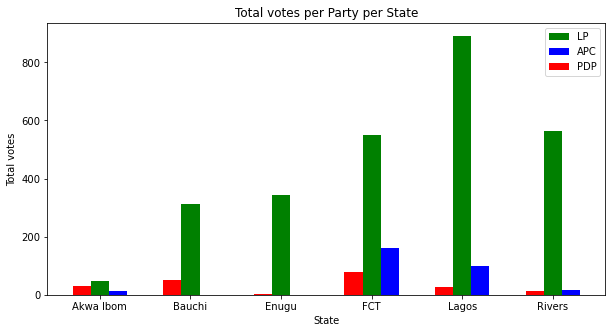

In [10]:
# plot the bar chart

x = result_per_state.index
x_axis = np.arange(len(x))
lp = result_per_state["LP"]
apc = result_per_state["APC"]
pdp = result_per_state["PDP"]
width = 0.2

plt.figure(figsize=(10,5))
plt.title("Total votes per Party per State")
plt.xlabel("State")
plt.ylabel("Total votes")
plt.bar(x=x_axis,height=lp,label="LP",width=width,color="g")
plt.bar(x=x_axis+width,height=apc,label="APC",width=width,color="b")
plt.bar(x=x_axis-width,height=pdp,label="PDP",width=width,color="r")
plt.xticks(x_axis,x)
plt.legend()
plt.show()

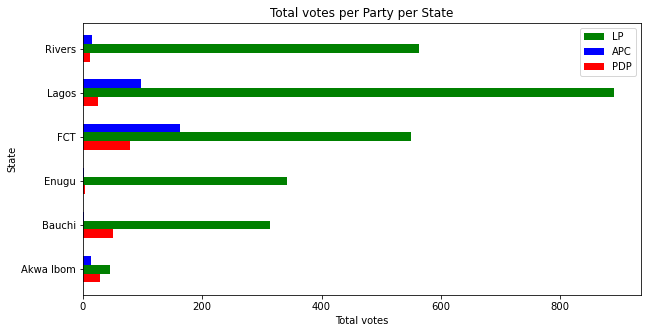

In [11]:
# plot the bar chart in horizontal format

x = result_per_state.index
x_axis = np.arange(len(x))
lp = result_per_state["LP"]
apc = result_per_state["APC"]
pdp = result_per_state["PDP"]
width = 0.2

plt.figure(figsize=(10,5))
plt.title("Total votes per Party per State")
plt.ylabel("State")
plt.xlabel("Total votes")
plt.barh(y=x_axis,width=lp,label="LP",height=width,color="g")
plt.barh(y=x_axis+width,width=apc,label="APC",height=width,color="b")
plt.barh(y=x_axis-width,width=pdp,label="PDP",height=width,color="r")
plt.yticks(x_axis,x)
plt.legend()
plt.show()

In [12]:
# create a new copy
result_per_state_percent = result_per_state.copy()

In [13]:
# converting the values to be percentages of the total
for x in result_per_state_percent.index:
    result_per_state_percent.loc[x,:] = (result_per_state_percent.loc[x,:]/result_per_state.loc[x,"Total"])*100

In [14]:
result_per_state

,LP,APC,PDP,Total
State,,,,
Akwa Ibom,46,13,29,119
Bauchi,313,1,51,370
Enugu,342,1,3,353
FCT,550,162,79,817
Lagos,891,98,26,1025
Rivers,563,16,12,594


In [15]:
result_per_state_percent

,LP,APC,PDP,Total
State,,,,
Akwa Ibom,38.655462,10.924370,24.369748,100
Bauchi,84.594595,0.270270,13.783784,100
Enugu,96.883853,0.283286,0.849858,100
FCT,67.319461,19.828641,9.669523,100
Lagos,86.926829,9.560976,2.536585,100
Rivers,94.781145,2.693603,2.020202,100
